# Derivatives in 2D

We will revise how to compute derivatives in 2D. In particular, we will compute the:

- Gradient of scalar fields


- Curl of vector fields


- Divergence of vector fields


To illustrate the process, we will use data from the ($50\times 50$ pixels) turbulence simulation that we studied earlier, plus one more simulatin ran on a finer grid (i.e. at higher numerical resolution, $200\times 200$ pixels)).

In [1]:
import pyvista as pv
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

## Get CGS normalisation units from units.out:

In [2]:
units_data = pd.read_csv("./sample-data/TURB_DRIVE_SUP/units.out")

#units_data = pd.read_csv("./TURB_DRIVE_SUP_hr/units.out")

In [3]:
print(units_data)

  variable  normalisation   units
0    rho_0   1.660000e-24  g/cm^3
1      v_0   1.000000e+06    cm/s
2      L_0   3.086000e+18      cm
3    c_iso   1.000000e+06    cm/s


In [4]:
rho_00   = np.array(units_data.loc[units_data["variable"] == "rho_0"]["normalisation"])
vel_00   = np.array(units_data.loc[units_data["variable"] == "v_0"]["normalisation"])
len_00   = np.array(units_data.loc[units_data["variable"] == "L_0"]["normalisation"])
c_iso   = np.array(units_data.loc[units_data["variable"] == "c_iso"]["normalisation"])

tim_00 = (len_00/vel_00)
bfi_00 = (np.sqrt(4*np.pi*rho_00*vel_00**2))

## Read meshes:

In [5]:
mesh = pv.read("./sample-data/TURB_DRIVE_SUP/data.0010.vtk")
mesh_hr = pv.read("./sample-data/TURB_DRIVE_SUP_hr/data.0010.vtk")

In [6]:
print(mesh)

RectilinearGrid (0x7f8d22353d70)
  N Cells:      2500
  N Points:     2601
  X Bounds:     -2.000e+00, 2.000e+00
  Y Bounds:     -2.000e+00, 2.000e+00
  Z Bounds:     0.000e+00, 0.000e+00
  Dimensions:   51, 51, 1
  N Arrays:     5



In [7]:
print(mesh_hr)

RectilinearGrid (0x7f8d22353e50)
  N Cells:      40000
  N Points:     40401
  X Bounds:     -2.000e+00, 2.000e+00
  Y Bounds:     -2.000e+00, 2.000e+00
  Z Bounds:     0.000e+00, 0.000e+00
  Dimensions:   201, 201, 1
  N Arrays:     5



## Read arrays:

#### Low-resolution:

In [8]:
# Getting the data arrays
rho = pv.get_array(mesh, "rho", preference = 'cell') #density in code units
vx1 = pv.get_array(mesh, "vx1", preference = 'cell') #vx in code units
vx2 = pv.get_array(mesh, "vx2", preference = 'cell') #vy in code units

Bx1 = pv.get_array(mesh, "Bx1", preference = 'cell') #Bx in code units
Bx2 = pv.get_array(mesh, "Bx2", preference = 'cell') #By in code units    

#### High-resolution:

In [9]:
# Getting the data arrays
rho_hr = pv.get_array(mesh_hr, "rho", preference = 'cell') #density in code units
vx1_hr = pv.get_array(mesh_hr, "vx1", preference = 'cell') #vx in code units
vx2_hr = pv.get_array(mesh_hr, "vx2", preference = 'cell') #vy in code units

Bx1_hr = pv.get_array(mesh_hr, "Bx1", preference = 'cell') #Bx in code units
Bx2_hr = pv.get_array(mesh_hr, "Bx2", preference = 'cell') #By in code units    

### 2D conversion:

#### Low-resolution:

In [10]:
# Convert the arrays to 2D
rho_2D = rho.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx1_2D = vx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx2_2D = vx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
Bx1_2D = Bx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
Bx2_2D = Bx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

# Convert arrays to CGS units
rho_cgs2D = rho_2D*rho_00
vx1_cgs2D = vx1_2D*vel_00
vx2_cgs2D = vx2_2D*vel_00
Bx1_cgs2D = Bx1_2D*bfi_00
Bx2_cgs2D = Bx2_2D*bfi_00

#### High-resolution:

In [11]:
# Convert the arrays to 2D
rho_2D_hr = rho_hr.reshape(mesh_hr.dimensions[0] - 1, mesh_hr.dimensions[1] - 1)
vx1_2D_hr = vx1_hr.reshape(mesh_hr.dimensions[0] - 1, mesh_hr.dimensions[1] - 1)
vx2_2D_hr = vx2_hr.reshape(mesh_hr.dimensions[0] - 1, mesh_hr.dimensions[1] - 1)
Bx1_2D_hr = Bx1_hr.reshape(mesh_hr.dimensions[0] - 1, mesh_hr.dimensions[1] - 1)
Bx2_2D_hr = Bx2_hr.reshape(mesh_hr.dimensions[0] - 1, mesh_hr.dimensions[1] - 1)

# Convert arrays to CGS units
rho_cgs2D_hr = rho_2D_hr*rho_00
vx1_cgs2D_hr = vx1_2D_hr*vel_00
vx2_cgs2D_hr = vx2_2D_hr*vel_00
Bx1_cgs2D_hr = Bx1_2D_hr*bfi_00
Bx2_cgs2D_hr = Bx2_2D_hr*bfi_00

## Create grids for plotting:

#### Low-resolution:

In [12]:
x = np.linspace(mesh.bounds[0]*len_00, mesh.bounds[1]*len_00, mesh.dimensions[0] - 1)
y = np.linspace(mesh.bounds[2]*len_00, mesh.bounds[3]*len_00, mesh.dimensions[1] - 1)

X, Y = np.meshgrid(x, y)

#### High-resolution:

In [13]:
x_hr = np.linspace(mesh_hr.bounds[0]*len_00, mesh_hr.bounds[1]*len_00, mesh_hr.dimensions[0] - 1)
y_hr = np.linspace(mesh_hr.bounds[2]*len_00, mesh_hr.bounds[3]*len_00, mesh_hr.dimensions[1] - 1)

X_hr, Y_hr = np.meshgrid(x_hr, y_hr)

In [14]:
#xx_hr = np.linspace(mesh_hr.bounds[0], mesh_hr.bounds[1], mesh_hr.dimensions[0] - 1)

In [15]:
print(X_hr.shape)

(200, 200)


## Plotting:

### Low-resolution density:

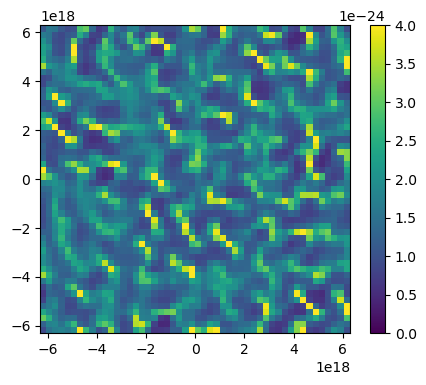

In [16]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(X, Y, rho_cgs2D, cmap = 'viridis', shading = 'auto', vmin = 0, vmax = 4.e-24)

CB1 = plt.colorbar(Z1)

plt.show()

### High-resolution density:

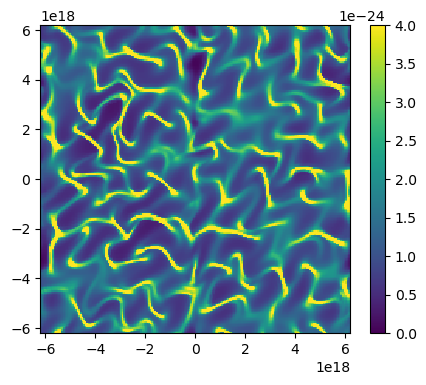

In [17]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(X_hr, Y_hr, rho_cgs2D_hr, cmap = 'viridis', shading = 'auto',  vmin = 0, vmax= 4.e-24)

CB1 = plt.colorbar(Z1)

plt.show()

# A. Gradient of scalar functions:

## Example:

Calculate the gradient of the density field: $\vec{\nabla} \rho$


## 1. Using numpy.gradient()

https://numpy.org/doc/stable/reference/generated/numpy.gradient.html

### First, we need to define the x-spacing:

In [18]:
dx = float(x[1] - x[0])

print(dx) # in CGS units already

2.5191836734693888e+17


### Then, we calculate the gradient:

In [19]:
gradient_rho = np.gradient(rho_cgs2D, dx)

### which returns a list containing the arrays with the components of the gradient:

$\frac{\partial \rho}{\partial x}$ along $x$.


$\frac{\partial \rho}{\partial y}$ along $y$.

In [20]:
print(type(gradient_rho))

print(gradient_rho)

<class 'list'>
[pyvista_ndarray([[ 1.38925929e-42,  1.17533651e-42,  5.11773084e-43, ...,
                  -2.94783706e-42, -7.80418467e-43,  1.59148054e-42],
                 [ 4.31438299e-42,  2.06024315e-42, -4.35312729e-44, ...,
                  -2.10107812e-42, -1.12038041e-42,  3.71424319e-42],
                 [ 2.24579405e-42,  2.58812611e-43, -5.11263869e-43, ...,
                  -4.86380496e-43, -9.47881546e-44,  8.25663788e-42],
                 ...,
                 [-1.13167445e-42, -7.61801596e-43, -4.46920780e-44, ...,
                   2.99050053e-42, -6.80919144e-43, -1.73171271e-42],
                 [-1.80450390e-42,  4.58507230e-44,  1.13270250e-42, ...,
                   1.56390047e-42, -1.65331801e-42, -2.05381444e-42],
                 [-2.22932951e-42,  2.39463633e-43,  2.05633597e-42, ...,
                  -2.79579849e-43, -1.56737798e-42, -1.95864570e-42]]), pyvista_ndarray([[ 2.30547330e-42,  1.59240746e-42,  5.42276474e-43, ...,
                   7.3

### Get gradient components:

In [21]:
xgradient_rho = gradient_rho[0]

ygradient_rho = gradient_rho[1]

In [22]:
print(xgradient_rho.shape)

(50, 50)


In [23]:
print(ygradient_rho.shape)

(50, 50)


### Then, we check that the units are consistent with the expected dimensions:

$\frac{\partial \rho}{\partial x}$ has units of $[M\,L^{-3}]/[L] = [M\,L^{-4}]$


In [24]:
print(np.max(rho_cgs2D))

6.0330088329315186e-24


In [25]:
print(x[1]-x[0])

[2.51918367e+17]


In [26]:
print(np.max(gradient_rho))

1.6037481945787857e-41


### Finally, we make plots of the gradient vector:

### Low-resolution simulation: 

#### Modulus of gradient:

In [27]:
modulus_gradient_rho = np.sqrt(xgradient_rho**2 + ygradient_rho**2)

#### Plot:

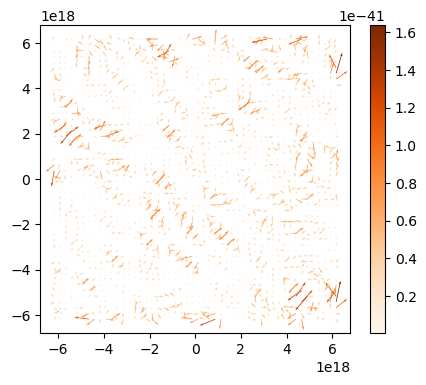

In [28]:
plt.figure(figsize = (5,4))

Z2 = plt.quiver(X, Y, xgradient_rho, ygradient_rho,\
                modulus_gradient_rho, cmap = 'Oranges')#, clim = (0, 1.e-40))

CB2 = plt.colorbar(Z2)

plt.show()

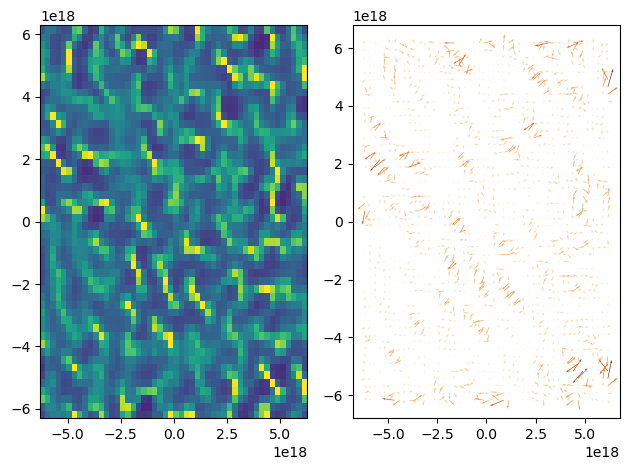

In [29]:
fig, axs = plt.subplots(1,2)

axs[0].pcolor(X, Y, rho_cgs2D, cmap = 'viridis',\
              shading = 'auto', vmin = 0, vmax = 4.e-24)
axs[1].quiver(X, Y, xgradient_rho, ygradient_rho,\
                modulus_gradient_rho, cmap = 'Oranges')

fig.tight_layout()

### High-resolution simulation: 

In [30]:
dx_hr = float(x_hr[1] - x_hr[0])

print(dx_hr)

6.203015075376845e+16


In [32]:
xx_hr = np.linspace(mesh_hr.bounds[0], mesh_hr.bounds[1], mesh_hr.dimensions[0] - 1)

In [33]:
dxx_hr = float(xx_hr[1] - xx_hr[0])

print(dxx_hr)

0.0201005025125629


In [34]:
gradient_rho_hr = np.gradient(rho_cgs2D_hr, dxx_hr)

In [35]:
xgradient_rho_hr = gradient_rho_hr[0]
ygradient_rho_hr = gradient_rho_hr[1]

In [36]:
modulus_gradient_rho_hr = np.sqrt(xgradient_rho_hr**2 + ygradient_rho_hr**2)

In [37]:
print(np.min(modulus_gradient_rho_hr))
print(np.max(modulus_gradient_rho_hr))

1.7006472945588393e-26
5.417893253553034e-22


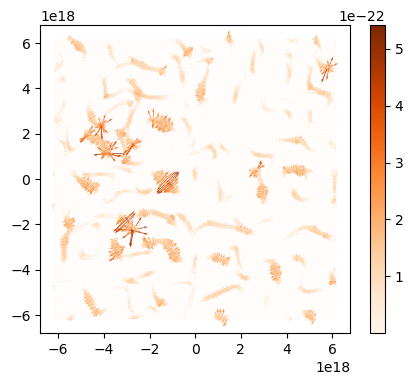

In [38]:
plt.figure(figsize = (5,4))

Z2 = plt.quiver(X_hr, Y_hr, ygradient_rho_hr, xgradient_rho_hr, modulus_gradient_rho_hr, cmap = 'Oranges')#, clim = (0, 1.e-40))

CB2 = plt.colorbar(Z2)

plt.show()

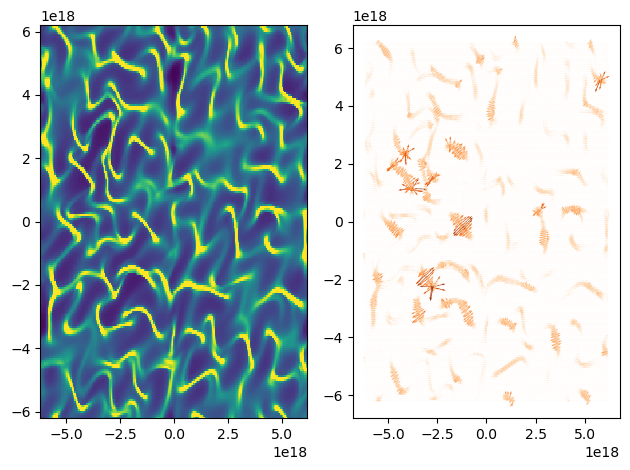

In [40]:
fig, axs = plt.subplots(1,2)

axs[0].pcolor(X_hr, Y_hr, rho_cgs2D_hr, cmap = 'viridis',\
              shading = 'auto', vmin = 0, vmax = 4.e-24)
axs[1].quiver(X_hr, Y_hr, ygradient_rho_hr, xgradient_rho_hr, modulus_gradient_rho_hr, cmap = 'Oranges')

fig.tight_layout()

#### Plot of the magnitude of the gradients:

Notice how we can see the edges of the filaments.

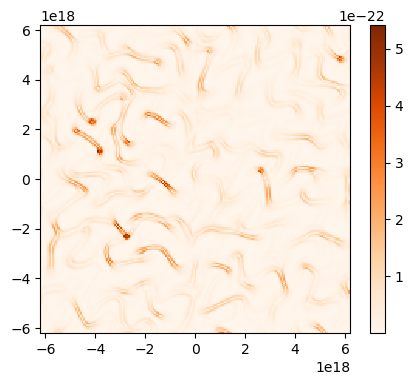

In [41]:
plt.figure(figsize = (5,4))

Z2 = plt.pcolor(X_hr, Y_hr, modulus_gradient_rho_hr, cmap = 'Oranges', shading = 'auto')#, clim = (0, 1.e-40), shading = 'auto')

CB2 = plt.colorbar(Z2)

plt.show()

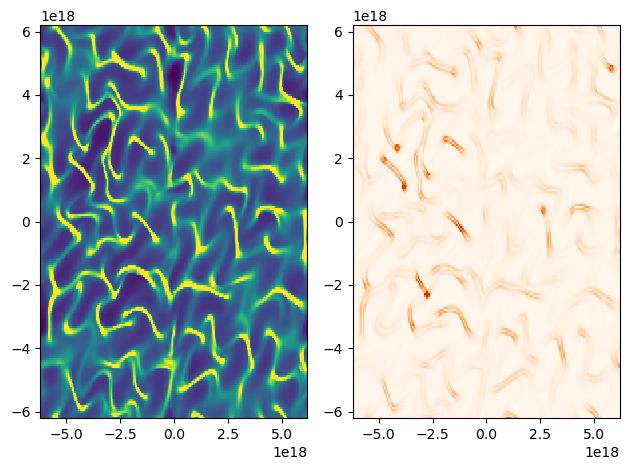

In [42]:
fig, axs = plt.subplots(1,2)

axs[0].pcolor(X_hr, Y_hr, rho_cgs2D_hr, cmap = 'viridis',\
              shading = 'auto', vmin = 0, vmax = 4.e-24)
axs[1].pcolor(X_hr, Y_hr, modulus_gradient_rho_hr, cmap = 'Oranges', shading = 'auto')#, clim = (0, 1.e-40), shading = 'auto')

fig.tight_layout()

## B. Curl of vector fields:

In [43]:
modulus_speed = np.sqrt(vx1_cgs2D**2 + vx2_cgs2D**2)

In [44]:
print(np.min(modulus_speed))
print(np.max(modulus_speed))


8038.680414262781
3234205.1495841267


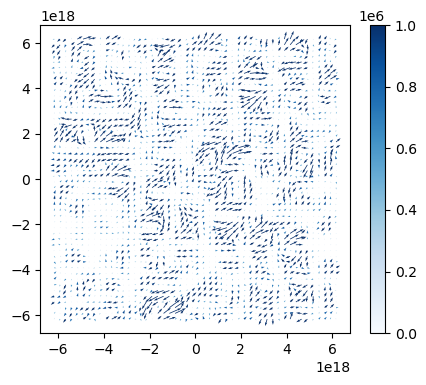

In [45]:
plt.figure(figsize = (5,4))

Z = plt.quiver(X, Y, vx1_cgs2D, vx2_cgs2D, modulus_speed, cmap = 'Blues', clim = (0, 1.e6))#, angles='xy', scale_units='xy', scale=1)

CB = plt.colorbar(Z)

plt.show()

In [46]:
modulus_speed_hr = np.sqrt(vx1_cgs2D_hr**2 + vx2_cgs2D_hr**2)

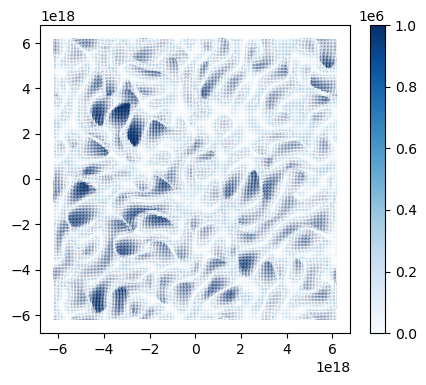

In [47]:
plt.figure(figsize = (5,4))

Z = plt.quiver(X_hr, Y_hr, vx1_cgs2D_hr, vx2_cgs2D_hr, modulus_speed_hr, cmap = 'Blues', clim = (0, 1.e6))#, angles='xy', scale_units='xy', scale=1)

CB = plt.colorbar(Z)

plt.show()

# Curl:

In [48]:
def get_curl(comp1, comp2, dx):
    """
    Get curl of vector field.
    """
    curl1 = np.gradient(comp1, dx, axis = 0)
    curl2 = np.gradient(comp2, dx, axis = 1)
    curlt = curl2 - curl1
    return curlt

In [49]:
# Call function

curl_vel = get_curl(vx1_cgs2D, vx2_cgs2D, dx)

In [50]:
print(np.max(curl_vel))
print(np.min(curl_vel))

1.0861750139250661e-11
-1.0526912216862451e-11


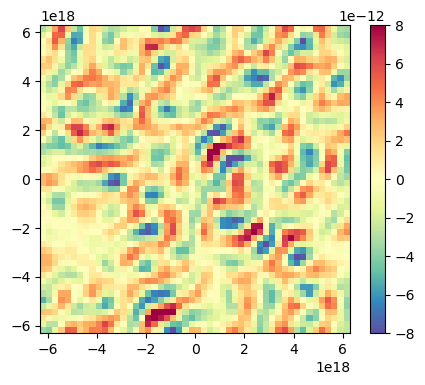

In [51]:
plt.figure(figsize = (5,4))

Z2 = plt.pcolor(X, Y, curl_vel, cmap = 'Spectral_r', shading = 'auto', vmin = -8e-12, vmax = 8.e-12)

CB2 = plt.colorbar(Z2)

plt.show()

In [52]:
xx = np.linspace(mesh_hr.bounds[0], mesh_hr.bounds[1], mesh_hr.dimensions[0] - 1)
yy = np.linspace(mesh_hr.bounds[2], mesh_hr.bounds[3], mesh_hr.dimensions[1] - 1)

dxx = xx[1] - xx[0]

print(dx, dxx)

print(xx.shape)

2.5191836734693888e+17 0.0201005025125629
(200,)


In [53]:
curl_vel_hr = get_curl(vx1_cgs2D_hr, vx2_cgs2D_hr, dx)

In [54]:
print(np.max(curl_vel_hr))
print(np.min(curl_vel_hr))

5.802751123441631e-12
-5.9285754228055415e-12


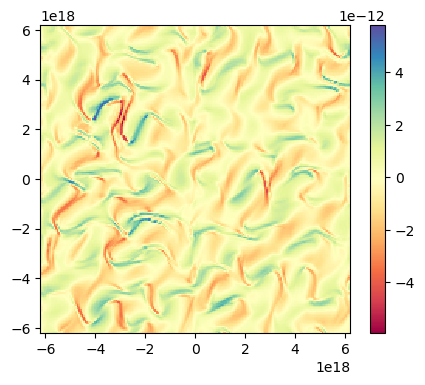

In [55]:
plt.figure(figsize = (5,4))

Z2 = plt.pcolor(X_hr, Y_hr, curl_vel_hr, cmap = 'Spectral', shading = 'auto')#, vmin = -8e7, vmax = 8.e7)

CB2 = plt.colorbar(Z2)

plt.show()

## Divergence of vector fields:


$$\vec{\nabla}\cdot \vec{B}= 0$$

In [56]:
modulus_bfield = np.sqrt(Bx1_cgs2D**2 + Bx2_cgs2D**2)

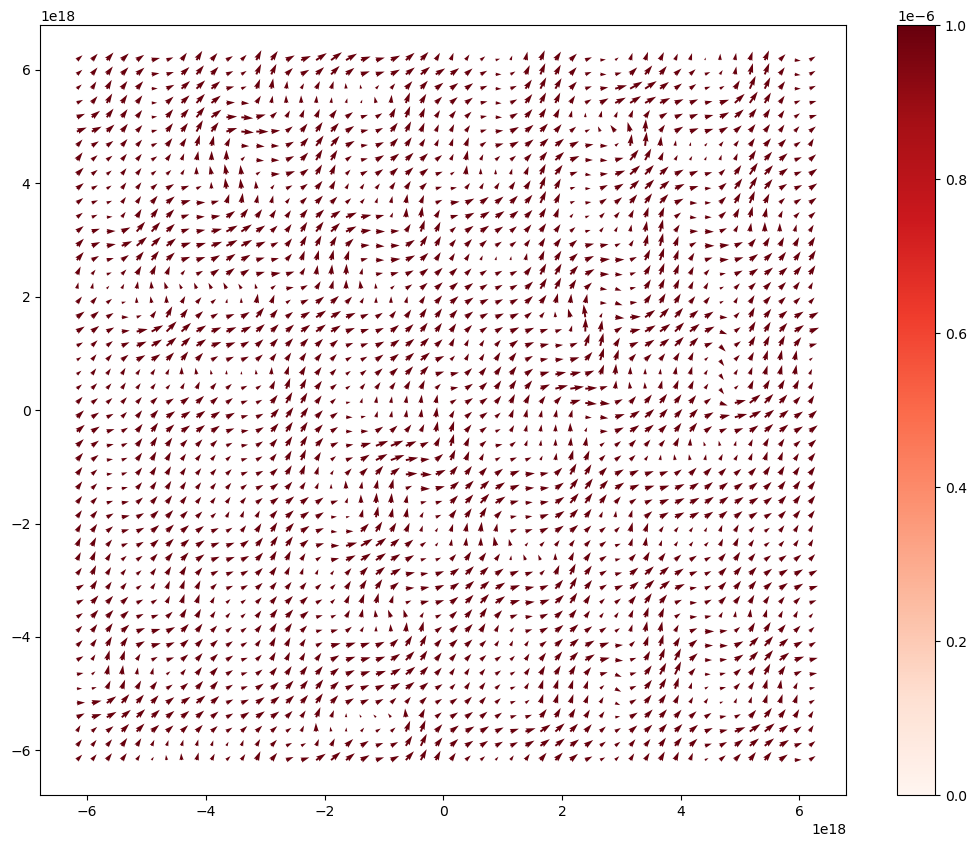

In [57]:
plt.figure(figsize = (13,10))

Z = plt.quiver(X, Y, Bx1_cgs2D, Bx2_cgs2D, modulus_bfield, cmap = 'Reds', clim = (0, 1.e-6))#, angles='xy', scale_units='xy', scale=1)

CB = plt.colorbar(Z)

plt.show()

In [59]:
def get_divergence(comp1, comp2, dx):
    
    """
    Function to get div of any vector.
    """
    
    div1 = np.gradient(comp1, dx, axis = 1)
    div2 = np.gradient(comp2, dx, axis = 0)
    
    divt = div1 + div2
    
    return divt

In [60]:
# Call our div function

div_bfield = get_divergence(Bx1_cgs2D, Bx2_cgs2D, dx)

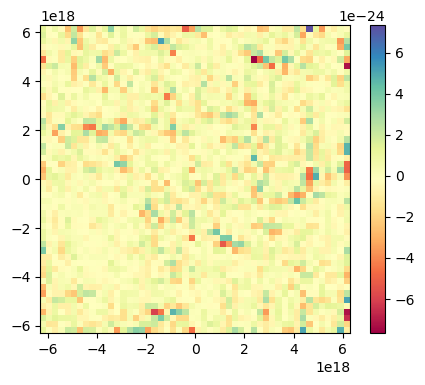

In [62]:
plt.figure(figsize = (5,4))

Z2 = plt.pcolor(X, Y, div_bfield, cmap = 'Spectral', shading = 'auto')#, vmin = -8e-12, vmax = 8.e-12)

CB2 = plt.colorbar(Z2)

plt.show()

In [63]:
div_bfield_hr = get_divergence(Bx1_cgs2D_hr, Bx2_cgs2D_hr, dx)

In [64]:
print(np.max(div_bfield_hr))
print(np.min(div_bfield_hr))

5.720235904264762e-24
-6.61692458310579e-24


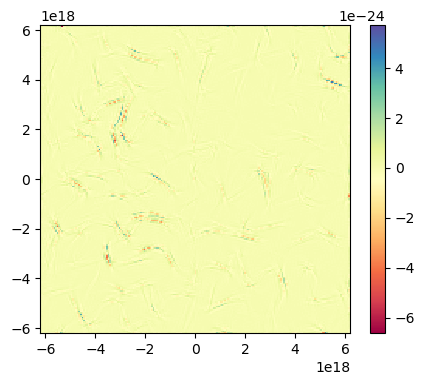

In [68]:
plt.figure(figsize = (5,4))

Z2 = plt.pcolor(X_hr, Y_hr, div_bfield_hr, cmap = 'Spectral', shading = 'auto')#, vmin = -8e-12, vmax = 8.e-12)

CB2 = plt.colorbar(Z2)

plt.show()

### 2nd option:

In [69]:
# Divergence function
def divergence(f,sp):
    num_dims = len(f)
    print(num_dims)
    #print(sp[0])
    return np.ufunc.reduce(np.add, [np.gradient(f[i], sp, axis=i) for i in range(num_dims)])


In [71]:
F = np.array([Bx1_cgs2D_hr, Bx2_cgs2D_hr])
sp_x = np.diff(xx)[0]

#print(sp_x)

#print(F[1])

In [72]:
div_bfield_hr2 = divergence(F, sp_x)

2


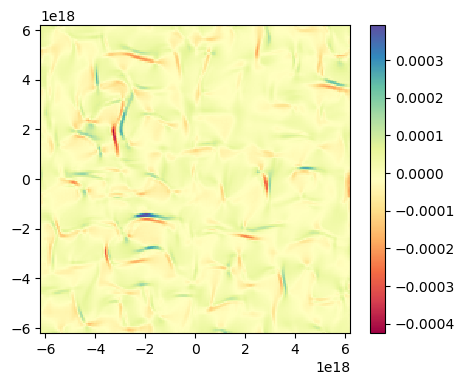

In [74]:
plt.figure(figsize = (5,4))

Z2 = plt.pcolor(X_hr, Y_hr, div_bfield_hr2, cmap = 'Spectral', shading = 'auto')#, vmin = -8e-12, vmax = 8.e-12)

CB2 = plt.colorbar(Z2)

plt.show()

### 3rd option:

In [82]:
def get_divergence2(comp1, comp2, x, y):
    diff_comp1 = np.diff(comp1,axis=1)[:-1,:]
    diff_x = np.diff(x,axis=1)[:-1,:]
    
    diff_comp2 = np.diff(comp2,axis=0)[:,:-1]
    diff_y = np.diff(y,axis=0)[:,:-1]    
    
    divt = diff_comp1/diff_x + diff_comp2/diff_y
    
    return divt

In [83]:
div_bfield2 = get_divergence2(Bx1_cgs2D, Bx2_cgs2D, X, Y)

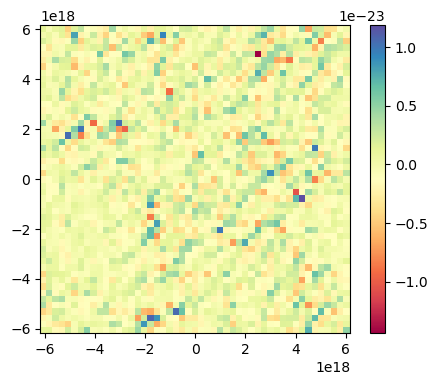

In [84]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(X, Y, div_bfield2, cmap = 'Spectral', shading = 'auto')#, vmin = -1e-4, vmax= 1e-4)
#Z2 = plt.quiver(X, Y, x_gradient_rho, y_gradient_rho, total_gradient_rho, cmap = 'Oranges', clim = (0, 1.e-40))

CB1 = plt.colorbar(Z1)

#CB2 = plt.colorbar(Z2)

plt.show()

In [85]:
div_bfield2_hr = get_divergence2(Bx1_cgs2D_hr, Bx2_cgs2D_hr, X_hr, Y_hr)

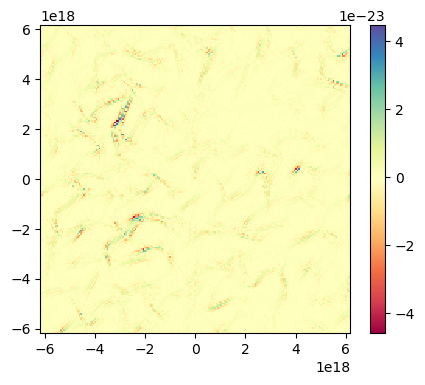

In [86]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(X_hr, Y_hr, div_bfield2_hr, cmap = 'Spectral', shading = 'auto')#, vmin = -1e-4, vmax= 1e-4)
#Z2 = plt.quiver(X, Y, x_gradient_rho, y_gradient_rho, total_gradient_rho, cmap = 'Oranges', clim = (0, 1.e-40))

CB1 = plt.colorbar(Z1)

#CB2 = plt.colorbar(Z2)

plt.show()